In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/12th Grade/Machine Learning/Data/spaceshipTitanic_train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/12th Grade/Machine Learning/Data/spaceshipTitanic_test.csv')

In [ ]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [ ]:
df.shape

(8693, 14)

In [ ]:
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

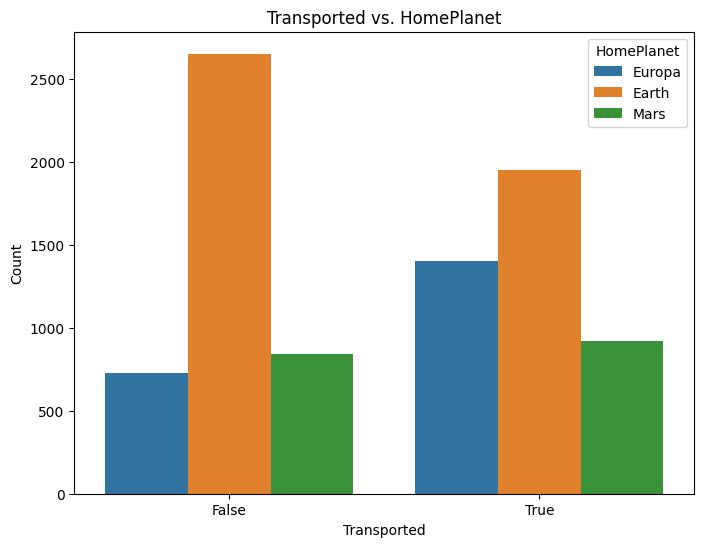

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar Chart to compare home planet and transported
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="Transported", hue="HomePlanet")
plt.title("Transported vs. HomePlanet")
plt.xlabel("Transported")
plt.ylabel("Count")
plt.show()

<Figure size 1200x600 with 0 Axes>

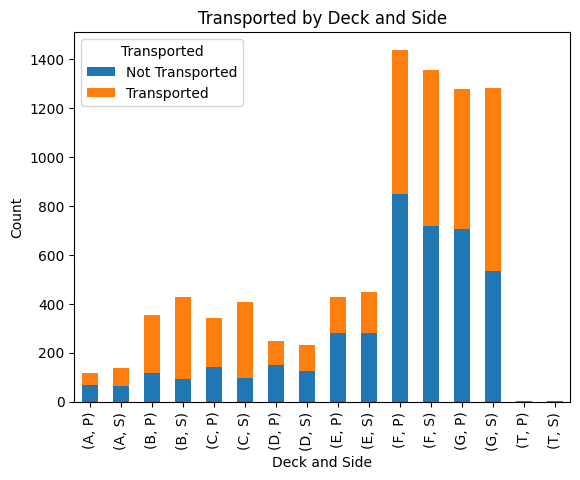

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
# bar graph combaring cabin group and location to trasported

df['Deck'] = df['Cabin'].str.split('/').str[0]

df['Side'] = df['Cabin'].str.split('/').str[2]

cabin_transported = df.groupby(['Deck', 'Side', 'Transported']).size().unstack().fillna(0)

plt.figure(figsize=(12, 6))
cabin_transported.plot(kind='bar', stacked=True)
plt.title("Transported by Deck and Side")
plt.xlabel("Deck and Side")
plt.ylabel("Count")
plt.legend(title="Transported", labels=["Not Transported", "Transported"])
plt.show()


In [ ]:
# Create a new column 'CombinedFeatures' by combining the values of selected columns in the original dataset
df['CombinedFeatures'] = df['RoomService'] + df['FoodCourt'] + df['ShoppingMall'] + df['Spa'] + df['VRDeck']

<ipython-input-221-1a961adfced9>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df[['Age', 'VIP', 'CombinedFeatures', 'Transported']].corr()


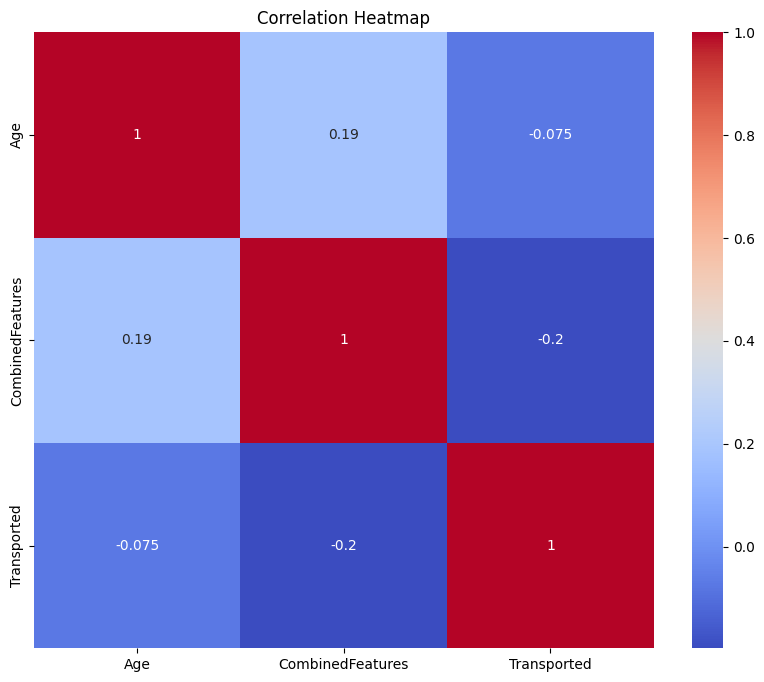

In [ ]:
# Heatmap comparing trasported, vip, age and combined features
plt.figure(figsize=(10, 8))
correlation_matrix = df[['Age', 'VIP', 'CombinedFeatures', 'Transported']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
#fill NA with median and most frequent
from sklearn.impute import SimpleImputer

numeric_imputer = SimpleImputer(strategy='median')
object_imputer = SimpleImputer(strategy='most_frequent')

# Apply imputation to numeric columns
df[numeric_columns] = numeric_imputer.fit_transform(df[numeric_columns])

# Apply imputation to object columns
df[object_columns] = object_imputer.fit_transform(df[object_columns])


In [ ]:
# if combined features is 0 then cryo freeze true
df['CryoFreeze'] = df['CombinedFeatures'].apply(lambda x: True if x == 0 else False)

In [ ]:
#if cabin A then VIP true
df['VIP'] = df['Cabin'].apply(lambda cabin: True if cabin.startswith('A') else False)

In [ ]:
import pandas as pd

# Extract the group information from 'PassengerId' (the first four characters)
df['Group'] = df['PassengerId'].str[:4]

# Fill missing values in 'HomePlanet' and 'Destination' based on the mode within the same group
df['HomePlanet'] = df.groupby('Group')['HomePlanet'].transform(lambda x: x.fillna(x.mode().iloc[0]))
df['Destination'] = df.groupby('Group')['Destination'].transform(lambda x: x.fillna(x.mode().iloc[0]))

# Drop the 'Group' column if you no longer need it
df.drop('Group', axis=1, inplace=True)

In [ ]:
features = ['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported', 'CombinedFeatures']

In [ ]:
df.isna().sum()

PassengerId           0
HomePlanet            0
CryoSleep             0
Cabin                 0
Destination           0
Age                   0
VIP                   0
RoomService           0
FoodCourt             0
ShoppingMall          0
Spa                   0
VRDeck                0
Name                  0
Transported           0
Deck                199
Side                199
CombinedFeatures    908
CryoFreeze            0
dtype: int64

In [ ]:
X = df[features]
y = df['Transported']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Fill in missing values in df
numeric_imputer = SimpleImputer(strategy='median')
object_imputer = SimpleImputer(strategy='most_frequent')

numeric_columns = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
object_columns = ['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name']

# Extract the group information from 'PassengerId' (the first four characters)
df['Group'] = df['PassengerId'].str[:4]

# Fill missing values in 'HomePlanet' and 'Destination' based on the mode within the same group
df['HomePlanet'] = df.groupby('Group')['HomePlanet'].transform(lambda x: x.fillna(x.mode().iloc[0]))
df['Destination'] = df.groupby('Group')['Destination'].transform(lambda x: x.fillna(x.mode().iloc[0]))

# Create 'CombinedFeatures' column in 'df'
df['CombinedFeatures'] = df['RoomService'] + df['FoodCourt'] + df['ShoppingMall'] + df['Spa'] + df['VRDeck']


# SimpleImputer
numeric_imputer = SimpleImputer(strategy='median')
object_imputer = SimpleImputer(strategy='most_frequent')

# Impute missing values in 'df' for both numeric and object columns
df[numeric_columns] = numeric_imputer.fit_transform(df[numeric_columns])
df[object_columns] = object_imputer.fit_transform(df[object_columns])

# Impute missing values in 'df_test' for both numeric and object columns using the same imputers
df_test[numeric_columns] = numeric_imputer.transform(df_test[numeric_columns])
df_test[object_columns] = object_imputer.transform(df_test[object_columns])

# Calculate 'CombinedFeatures' and impute missing values in 'df_test' for numeric columns
df_test['CombinedFeatures'] = df_test['RoomService'] + df_test['FoodCourt'] + df_test['ShoppingMall'] + df_test['Spa'] + df_test['VRDeck']
df_test[numeric_columns] = numeric_imputer.transform(df_test[numeric_columns])
df_test[object_columns] = object_imputer.transform(df_test[object_columns])

# Drop the 'Group' column from 'df'
df.drop('Group', axis=1, inplace=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LogisticRegression(class_weight='balanced')

encoder = OneHotEncoder(handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train[['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'CombinedFeatures']]).toarray()
X_test_encoded = encoder.transform(X_test[['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'CombinedFeatures']]).toarray()

# Train the model on the training data
lr.fit(X_train_encoded, y_train)

# Make predictions on the test data
y_pred = lr.predict(X_test_encoded)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
'''
Tials and results
-----------------

X_train_encoded = encoder.fit_transform(X_train[['CryoSleep', 'Cabin', 'Age', 'CombinedFeatures','VIP']]).toarray()
X_test_encoded = encoder.transform(X_test[['CryoSleep', 'Cabin', 'Age', 'CombinedFeatures','VIP']]).toarray()
Collab - 0.7441058079355952
Kaggle - 0.72597

X_train_encoded = encoder.fit_transform(X_train[['CryoSleep', 'Cabin', 'Age', 'VIP']]).toarray()
X_test_encoded = encoder.transform(X_test[['CryoSleep', 'Cabin', 'Age', 'VIP']]).toarray()
Collab - 0.7320299022426682
Kaggle - 0.73673

X_train_encoded = encoder.fit_transform(X_train[['Cabin', 'Age','CombinedFeatures', 'Destination','HomePlanet']]).toarray()
X_test_encoded = encoder.transform(X_test[['Cabin', 'Age', 'CombinedFeatures', 'Destination','HomePlanet']]).toarray()
Collab - 0.7096032202415181
Kaggle - 0.73626

X_train_encoded = encoder.fit_transform(X_train[['CryoSleep', 'Age','CombinedFeatures', 'Destination','HomePlanet']]).toarray()
X_test_encoded = encoder.transform(X_test[['Cabin', 'Age', 'CombinedFeatures', 'Destination','HomePlanet']]).toarray()
Collab - 0.7239792984473835
Kaggle - 0.73626

X_train_encoded = encoder.fit_transform(X_train[['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'CombinedFeatures']]).toarray()
X_test_encoded = encoder.transform(X_test[['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'CombinedFeatures']]).toarray()
Collab - 0.7613571017826337
Kaggle - 0.75146

'''

"\nTials and results\n-----------------\n\nX_train_encoded = encoder.fit_transform(X_train[['CryoSleep', 'Cabin', 'Age', 'CombinedFeatures','VIP']]).toarray()\nX_test_encoded = encoder.transform(X_test[['CryoSleep', 'Cabin', 'Age', 'CombinedFeatures','VIP']]).toarray()\nCollab - 0.7441058079355952\nKaggle - 0.72597\n\nX_train_encoded = encoder.fit_transform(X_train[['CryoSleep', 'Cabin', 'Age', 'VIP']]).toarray()\nX_test_encoded = encoder.transform(X_test[['CryoSleep', 'Cabin', 'Age', 'VIP']]).toarray()\nCollab - 0.7320299022426682\nKaggle - 0.73673\n\nX_train_encoded = encoder.fit_transform(X_train[['Cabin', 'Age','CombinedFeatures', 'Destination','HomePlanet']]).toarray()\nX_test_encoded = encoder.transform(X_test[['Cabin', 'Age', 'CombinedFeatures', 'Destination','HomePlanet']]).toarray()\nCollab - 0.7096032202415181\nKaggle - 0.73626\n\nX_train_encoded = encoder.fit_transform(X_train[['CryoSleep', 'Age','CombinedFeatures', 'Destination','HomePlanet']]).toarray()\nX_test_encoded = e

In [ ]:
df.isna().sum()

PassengerId           0
HomePlanet            0
CryoSleep             0
Cabin                 0
Destination           0
Age                   0
VIP                   0
RoomService           0
FoodCourt             0
ShoppingMall          0
Spa                   0
VRDeck                0
Name                  0
Transported           0
Deck                199
Side                199
CombinedFeatures      0
CryoFreeze            0
dtype: int64

In [ ]:
logreg = LogisticRegression(solver = 'newton-cg', random_state=42)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7613571017826337


In [ ]:
# Create a DataFrame for the test predictions
X_test_encoded = encoder.transform(df_test[['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'CombinedFeatures']]).toarray()
y_pred_test = lr.predict(X_test_encoded)
kaggle = pd.DataFrame({
    'PassengerId': df_test['PassengerId'],
    'Transported': y_pred_test.astype(bool)
})

In [ ]:
kaggle.to_csv('/content/drive/MyDrive/12th Grade/Machine Learning/Data/spaceshipTitanic_predictions.csv', index=False)